In [21]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

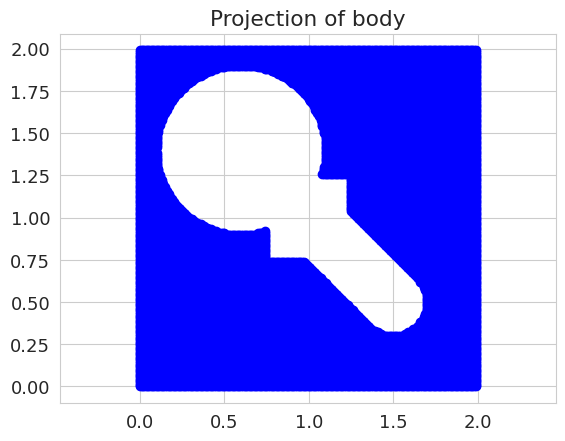

In [22]:
# Load data from the file
data1 = np.loadtxt("../data/RayOriginsCapF.dat", delimiter=',')
x1, y1 = data1[:, 0], data1[:, 1]
# Scatter plot the points
plt.scatter(x1, y1, c='blue', label='Active Ray Origins')
plt.axis('equal')
plt.title('Projection of body')
# Show the plot
plt.show()

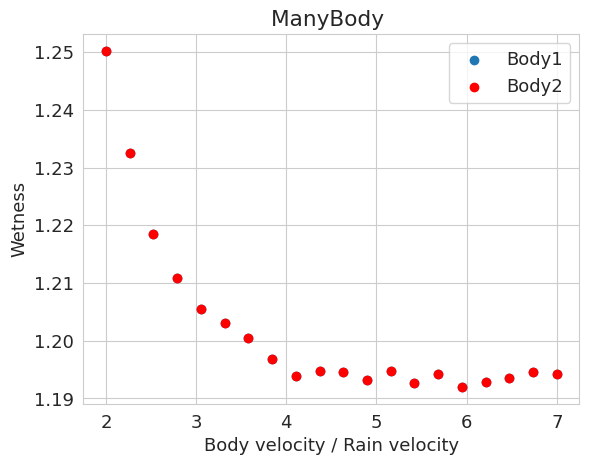

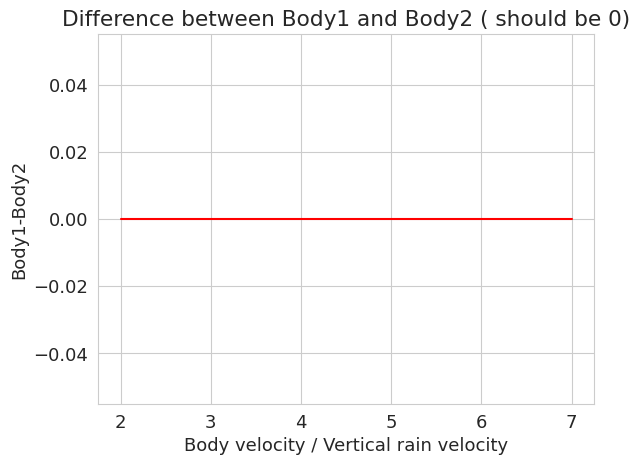

In [23]:
# Read the data from the file
with open("../data/CompareManyBody.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Plot the data
plt.scatter(x_values, y1_values, label='Body1')
plt.scatter(x_values, y2_values, color='red', label='Body2')

# Add labels and title
plt.xlabel('Body velocity / Rain velocity')
plt.ylabel('Wetness')
plt.title('ManyBody ')
plt.grid(True)

#plt.ylim(0,100)
# Add legend
plt.legend()

# Show the plot
plt.show()

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Plot the difference
plt.plot(x_values, difference, color='red')

# Add labels and title
plt.xlabel('Body velocity / Vertical rain velocity')
plt.ylabel('Body1-Body2')
plt.title('Difference between Body1 and Body2 ( should be 0)')
plt.grid(True)

# Show the plot
plt.show()

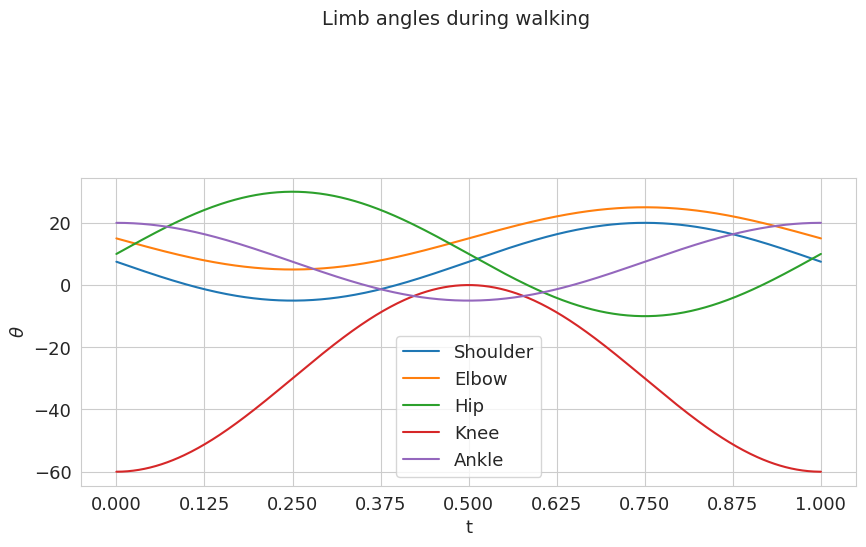

In [24]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 4))

# Plot each function
plt.plot(x, 7.5 + -12.5*np.sin(np.pi*2*x), label='Shoulder')
plt.plot(x, 15 + -10*np.sin(np.pi*2*x), label='Elbow')
plt.plot(x, 10 + 20*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -30 - 30*np.cos(np.pi*2*x), label='Knee')
plt.plot(x, 7.5 + 12.5*np.cos(np.pi*2*x), label='Ankle')

# Customizing the plot
sns.set_style('whitegrid')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.legend()

# Place the title 
plt.figtext(0.5, 1.3, 'Limb angles during walking', ha='center', va='top', fontsize=14)


# Save the plot to a file
# plt.savefig('walking_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

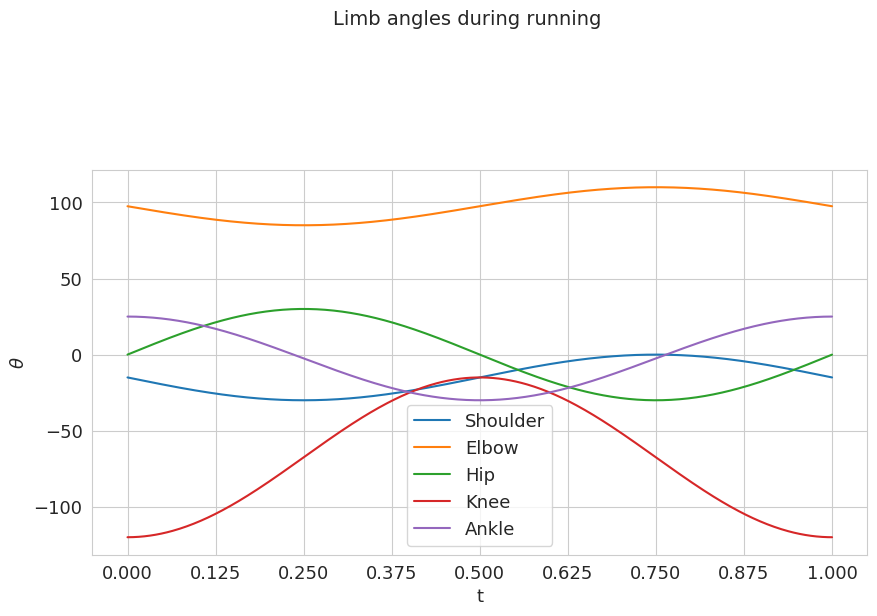

In [25]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 5))

# Plot each function
plt.plot(x, -15 - 15*np.sin(np.pi*2*x), label='Shoulder')
plt.plot(x, 97.5 - 12.5*np.sin(np.pi*2*x), label='Elbow')
plt.plot(x, 0 + 30*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, -67.5 - 52.5*np.cos(np.pi*2*x), label='Knee')
plt.plot(x, -2.5 + 27.5*np.cos(np.pi*2*x), label='Ankle')

# Customizing the plot
sns.set_style('whitegrid')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.legend()

# Place the title below the graph
plt.figtext(0.5, 1.2, 'Limb angles during running', ha='center', va='top', fontsize=14)


# Save the plot to a file
# plt.savefig('running_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

/tmp/ipykernel_11883/1004509622.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


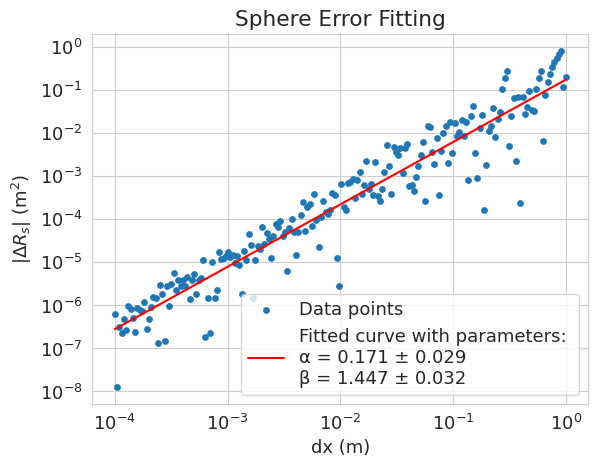

In [26]:
def anal_s(v, bodyvel, rad):
    surface = np.pi * rad ** 2
    return np.linalg.norm(v) * surface / bodyvel

def max_s(rad):
    return np.pi * rad ** 2

vrain = np.array( [0.5, 0.25, -1.])
bodyvel = 2.
v = vrain - np.array([bodyvel, 0., 0,])
rad = 0.5


# Read the data from the file
df = pd.read_csv('../data/Sphere/ErrorS.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_s( v, bodyvel, rad))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Function to model (log-log power law)
def power_law(x, a, b):
    return np.log(a) +  b*x

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(power_law(df['log_dx'], *params))

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'dx (m)')
plt.ylabel(r'$|\Delta R_s|$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fitted curve with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.title('Sphere Error Fitting')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/sphere_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

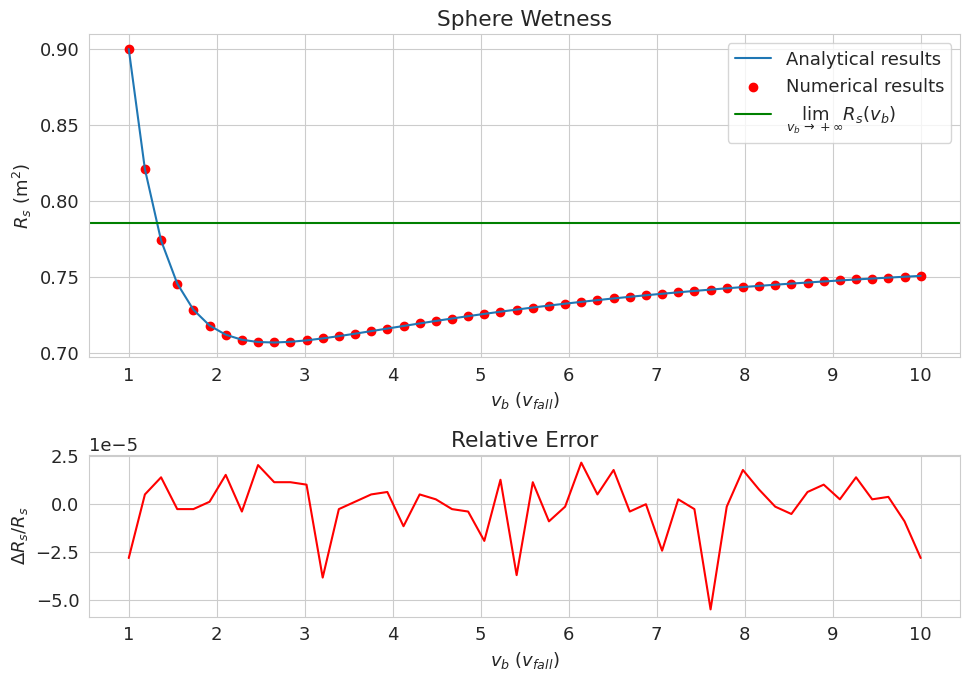

In [27]:
# Read the data from the file
with open("../data/Sphere/CompareS.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]


# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Ratio 2:1 for the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_s(rad), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_xlabel(r'$v_b$ $(v_{fall})$')
ax1.set_ylabel(r'$R_s$ (m$^2$)')
ax1.set_title('Sphere Wetness')
ax1.grid(True)
ax1.legend()

# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b$ $(v_{fall})$')
ax2.set_ylabel(r'$\Delta R_s/R_s$')
ax2.set_title('Relative Error')
ax2.grid(True)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/sphere_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_11883/1004509622.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


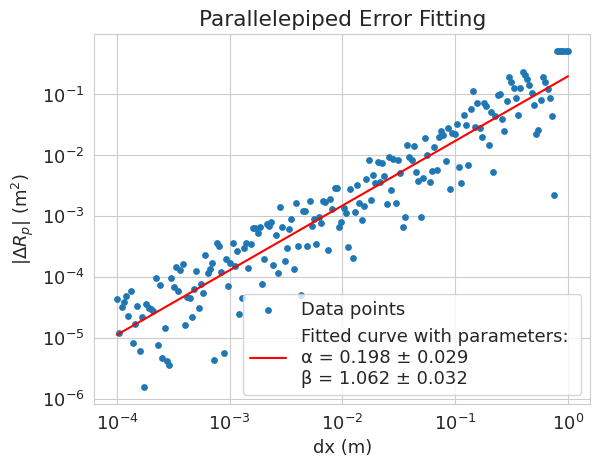

In [28]:
def anal_p(v, bodyvel, side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), v))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), v))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), v))
    return flux/bodyvel

def max_p(side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), [1,0,0]))
    return flux


side = [np.array([0.4, 0.0, 0.0]), np.array([0.0, 0.6, 0.0]), np.array([0.0, 0.0, 0.8])]

# Read the data from the file
df = pd.read_csv('../data/Pippo/ErrorP.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_p(v, bodyvel, side))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'dx (m)')
plt.ylabel(r'$|\Delta R_p|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fitted curve with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.title('Parallelepiped Error Fitting')  
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/pippo_error_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

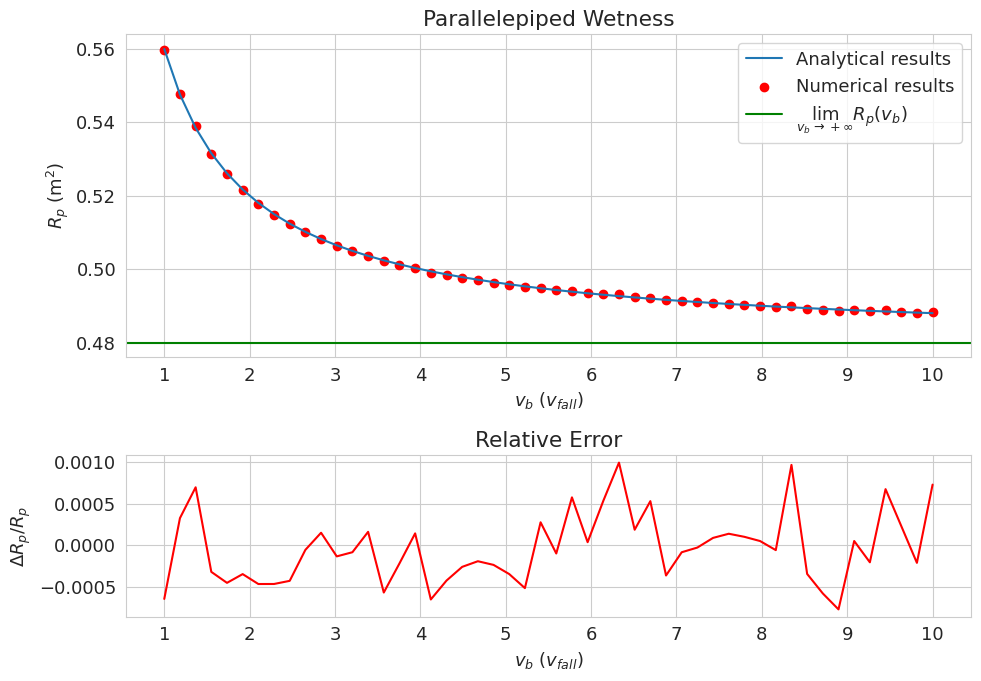

In [29]:
# Read the data from the file
with open("../data/Pippo/CompareP.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Ratio 2:1 for the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_p(side), label=r'$\lim_{v_b\to+\infty} R_p(v_b)$', color='green')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_xlabel(r'$v_b$ $(v_{fall})$')
ax1.set_ylabel(r'$R_p$ (m$^2$)')
ax1.set_title('Parallelepiped Wetness')
ax1.grid(True)
ax1.legend()

# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b$ $(v_{fall})$')
ax2.set_ylabel(r'$\Delta R_p/R_p$')
ax2.set_title('Relative Error')
ax2.grid(True)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/pippo_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_11883/1004509622.py:24: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


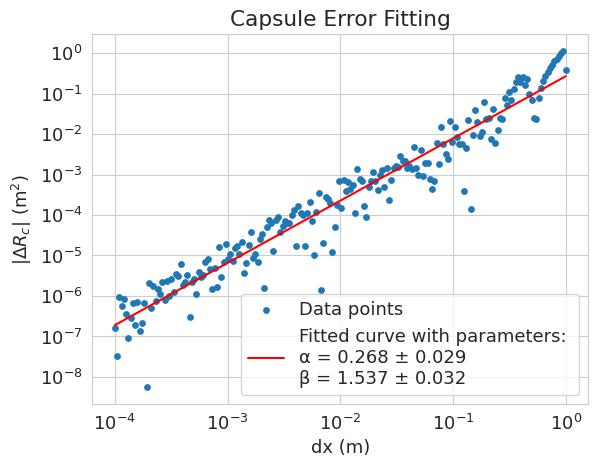

In [30]:
def anal_c(v, bodyvel, l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot(v, axis) * np.array(v) / np.dot(v, v)

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Computing the surface
    surface = np.pi * rad ** 2 + L * 2 * rad

    # Returning the final result
    return np.linalg.norm(v) * surface / bodyvel

def max_c( l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot([1,0,0], axis) * np.array([1,0,0])

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Returning the final result
    return np.pi * rad ** 2 + L * 2 * rad

r = 0.3
l1 = np.array( [0.35, 0.35, 0.35])
l2 = np.array( [0.75, 0.75, 0.75])


# Read the data from the file
df = pd.read_csv('../data/Capsule/ErrorC.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)

# Transform the data
df['error'] = np.abs(df['num'] - anal_c(v, bodyvel, l1, l2, r))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'dx (m)')
plt.ylabel(r'$|\Delta R_c|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fitted curve with parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.title('Capsule Error Fitting')  
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/capsule_error_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

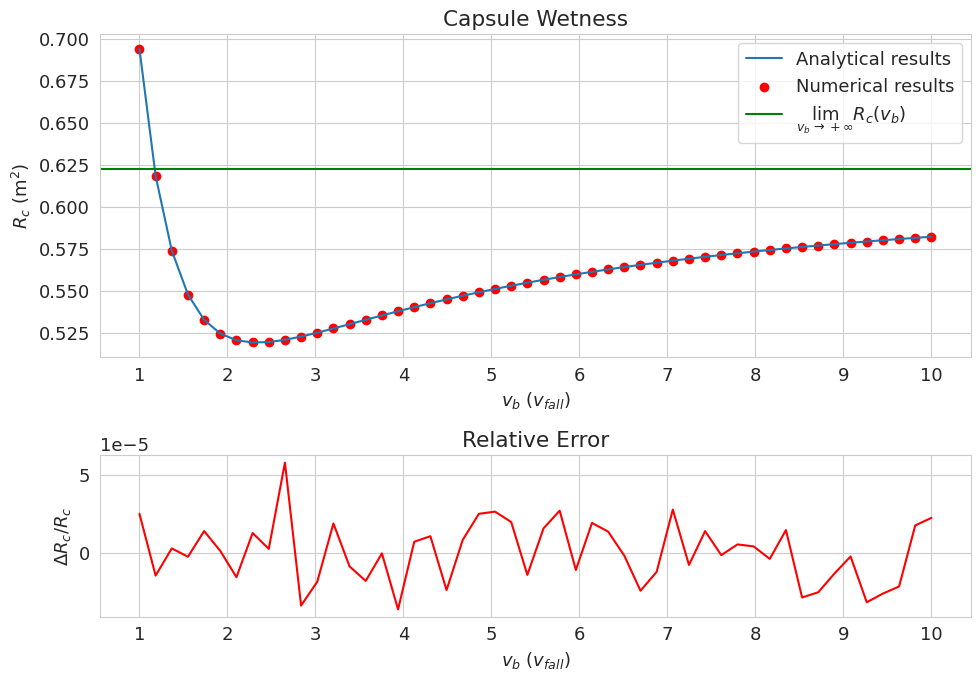

In [31]:
# Read the data from the file
with open("../data/Capsule/CompareC.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

#Calculate the difference between Y1 and Y2
difference = [(y2 - y1)/y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Ratio 2:1 for the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytical results')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_c(l1, l2, r), label=r'$\lim_{v_b\to+\infty} R_c(v_b)$', color='green')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_xlabel(r'$v_b$ $(v_{fall})$')
ax1.set_ylabel(r'$R_c$ (m$^2$)')
ax1.set_title('Capsule Wetness')
ax1.grid(True)
ax1.legend()

# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b$ $(v_{fall})$')
ax2.set_ylabel(r'$\Delta R_c/R_c$')
ax2.set_title('Relative Error')
ax2.grid(True)

# Adjust layout for clarity
plt.tight_layout()


# Save the plot to a file
plt.savefig('../Tesi/capsule_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()